In [ ]:
#SUPPORT VECTOR CLASSIFIER(SVC)
#DATASET-SPAM HAM DATASET
#DATASET=https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv


In [ ]:
#1
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/diazoniclabs/Machine-Learning-using-sklearn/master/Datasets/spam.tsv',sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [ ]:
df.shape

(5572, 4)

In [ ]:
df.size

22288

In [ ]:
#i want to check exact no of spam and ham
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [ ]:
#spam--unwanted messages


<Axes: xlabel='label'>

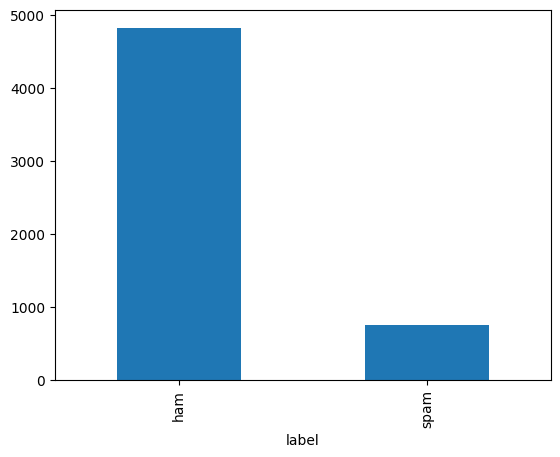

In [ ]:
df['label'].value_counts().plot(kind='bar')


In [ ]:
#4 input output
#input output
#message input
#lavel op
x=df.iloc[:,1].values #only when text messages are involved inpt is 1 dim
y=df.iloc[:,0].values
print(x)
print(y)


#exceptional case as it is 1 dim bcaz of test

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [ ]:
#5 train and test variables
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)


In [ ]:
#6 apply tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer()
x_train_v=vect.fit_transform(x_train) #saving in diff variable unlike before
x_test_v=vect.transform(x_test)

In [ ]:
#7 apply classifier,regressor or clusterizer
from sklearn.svm import SVC
model=SVC()

In [ ]:
#8 model fitting
model.fit(x_train_v,y_train)


SVC()

In [ ]:
#9 predict the output
y_pred=model.predict(x_test_v)
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [ ]:
# individual prediction
a=df['message'][10] #10th index
a

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [ ]:
a=vect.transform([a])
model.predict(a)

array(['ham'], dtype=object)

In [ ]:
b=df['message'][12]
b

'URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'

In [ ]:
b=vect.transform([b])
model.predict(b)

array(['spam'], dtype=object)

In [ ]:
#check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

#before pipelinin

98.56424982053123

In [ ]:
#1..gathered the data
#..divided into ip and op
#2.APLIED TRAIN TEST SPLIT
#3..APPLIED TFIDF VECTORIZER
#4..SVC
#5..PREDICTED THE OP


In [ ]:
#IF I HAVE TO DEPLOY MY MODULE,,IWILL HAVE TO PIPELINE
#PIPELINING---COMBINING TWO OR MORE MODULES OR LIBRARIES
#SO HERE I AM PIPELINING OR COMBINING SVC OR TFIDF VECTORIZER
#PIPELININ ORDER TO MAKE OUR MODEL READY FOR DEPLOYMENT

In [ ]:
#pipelining
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(TfidfVectorizer(),SVC())  #combining svc and tfidf
text_model.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()), ('svc', SVC())])

In [ ]:
#predict op
y_pred1=text_model.predict(x_test)
y_pred1
#predicted op after pipeline

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
y_test

array(['ham', 'spam', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [ ]:

accuracy_score(y_pred1,y_test)*100

98.56424982053123

In [ ]:
#custom
a1=df['message'][2]
a1

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [ ]:
text_model.predict([a1])

array(['spam'], dtype=object)